In [11]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [12]:
params = {
    "readout_lo_frequency": 7.2e9,
    "drive_lo_frequency": 5e9,
    "ext_lo": 11e9
}

### Resonator spectroscopy

In [13]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 800

result = rr_spec.run(
    # [np.linspace(7e9, 8e9, 2001)],
    [rr_spec.sweep_around("readout_resonator_frequency", 20e6, n_points=201)],
    sweeps={"readout_amplitude": np.linspace(0.003, 0.06, 21)},
    # sweeps={"index": np.arange(200)},
    qu_ids=["q0"],
    options=options,
    update_params=True,
)

2025-08-06 23:48:56,866 - INFO - Successfully connected to zi


[2025.08.06 23:48:56.871] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.06 23:48:56.872] INFO    VERSION: laboneq 2.57.0
[2025.08.06 23:48:56.872] INFO    Connecting to data server at localhost:8004
[2025.08.06 23:48:56.877] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.06 23:48:56.884] INFO    Configuring the device setup
[2025.08.06 23:48:56.891] INFO    The device setup is configured


2025-08-06 23:48:56,894 - INFO - Setting up instruments
2025-08-06 23:48:56,895 - INFO - Before exp


[2025.08.06 23:48:56.906] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.06 23:48:56.908] INFO    Starting LabOne Q Compiler run...
[2025.08.06 23:48:56.936] INFO    Schedule completed. [0.025 s]
[2025.08.06 23:48:56.958] INFO    Code generation completed for all AWGs. [0.022 s]
[2025.08.06 23:48:56.959] INFO    Completed compilation step 1 of 1. [0.049 s]
[2025.08.06 23:48:56.962] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:48:56.962] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.06 23:48:56.962] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:48:56.962] INFO      shfqc_0        0         21            0           1      8000  
[2025.08.06 23:48:56.962] INFO      shfqc_0_sg     0          9            1           0         0  
[2025.08.06 23:48:56.962] INFO     ─────────────────────────────────────────

CancelledError: 

### Qubit specroscopy

2025-08-06 23:41:54,784 - INFO - Successfully connected to zi


[2025.08.06 23:41:54.789] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.06 23:41:54.791] INFO    VERSION: laboneq 2.57.0
[2025.08.06 23:41:54.791] INFO    Connecting to data server at localhost:8004
[2025.08.06 23:41:54.795] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.06 23:41:54.801] INFO    Configuring the device setup
[2025.08.06 23:41:54.810] INFO    The device setup is configured


2025-08-06 23:41:54,819 - INFO - Setting up instruments
2025-08-06 23:41:54,819 - INFO - Before exp


[2025.08.06 23:41:54.832] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.06 23:41:54.834] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.06 23:41:54.834] INFO    Starting LabOne Q Compiler run...
[2025.08.06 23:41:54.885] INFO    Schedule completed. [0.048 s]
[2025.08.06 23:41:55.028] INFO    Code generation completed for all AWGs. [0.141 s]
[2025.08.06 23:41:55.028] INFO    Completed compilation step 1 of 1. [0.192 s]
[2025.08.06 23:41:55.028] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:41:55.028] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.06 23:41:55.028] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:41:55.028] INFO      shfqc_0        0         11            0           1      8000  
[2025.08.06 23:41:55.028] INFO      shfqc_0_

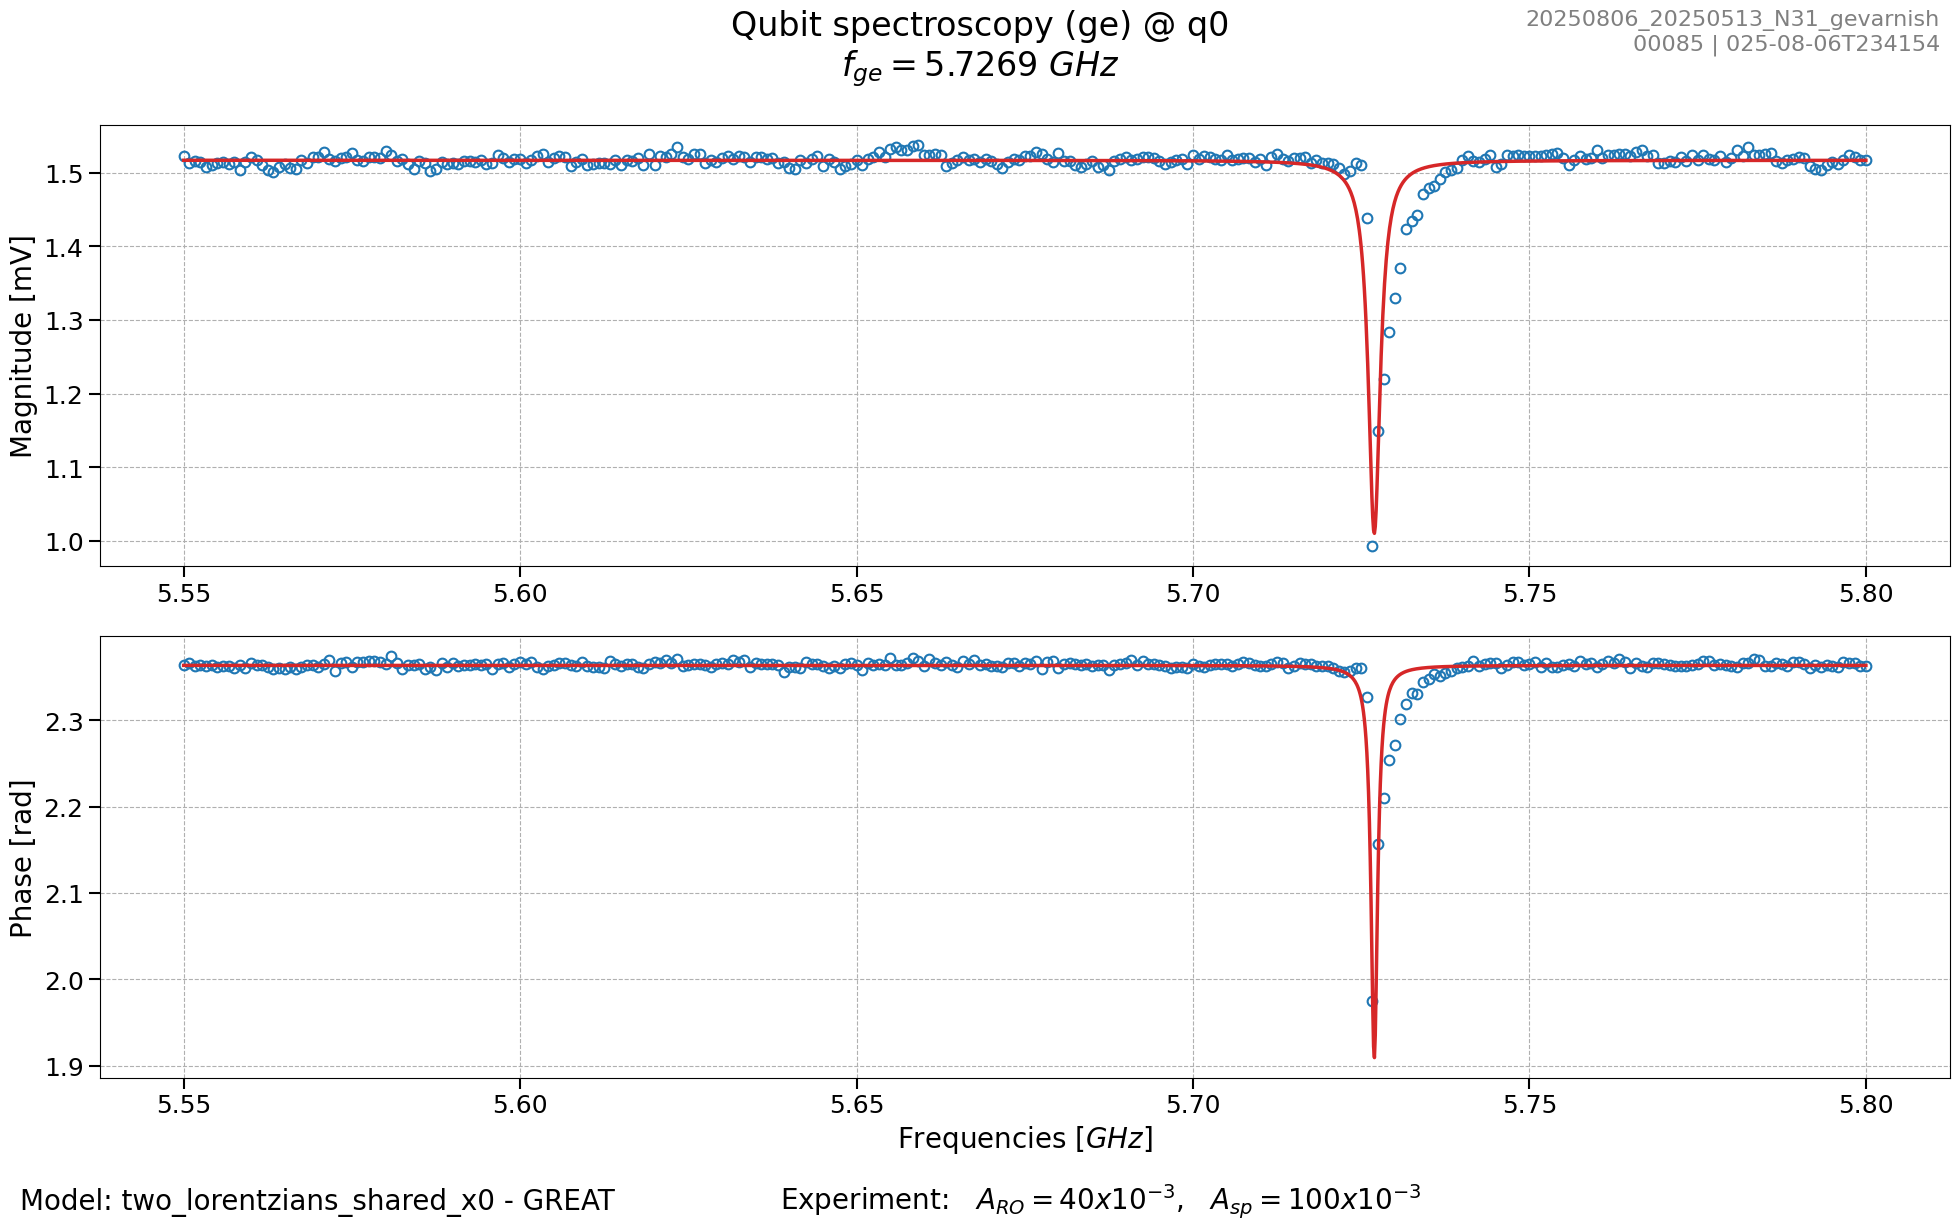

In [ ]:
import numpy as np
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode, AcquisitionType

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 800
options.averaging_mode = AveragingMode.CYCLIC
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = qu_spec.run(
    [np.linspace(5.55e9, 5.8e9, 301)],  # , np.linspace(5.55e9, 5.8e9, 301)
    # [qu_spec.sweep_around("resonance_frequency_ge", 10e6, n_points=101)],
    # sweeps={"spectroscopy_amplitude": np.linspace(0.8,1,5)},
    # sweeps={"index": np.arange(3)},
    # sweeps={"spectroscopy_amplitude": np.linspace(0.003, 1, 70)},
    transition="ge",
    qu_ids=["q0"],
    options=options,
    update_params=False,
    relevant_params=["readout_amplitude", "spectroscopy_amplitude"],
)

### Time Rabi

2025-08-06 23:41:58,408 - INFO - Successfully connected to zi


[2025.08.06 23:41:58.415] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.06 23:41:58.415] INFO    VERSION: laboneq 2.57.0
[2025.08.06 23:41:58.415] INFO    Connecting to data server at localhost:8004
[2025.08.06 23:41:58.415] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.06 23:41:58.425] INFO    Configuring the device setup
[2025.08.06 23:41:58.431] INFO    The device setup is configured


2025-08-06 23:41:58,442 - INFO - Setting up instruments
2025-08-06 23:41:58,447 - INFO - Before exp


[2025.08.06 23:41:58.458] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.06 23:41:58.458] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.06 23:41:58.458] INFO    Starting LabOne Q Compiler run...
[2025.08.06 23:41:58.469] INFO    Schedule completed. [0.008 s]
[2025.08.06 23:41:58.469] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.08.06 23:41:58.485] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.08.06 23:41:58.485] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.08.06 23:41:58.485] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skip

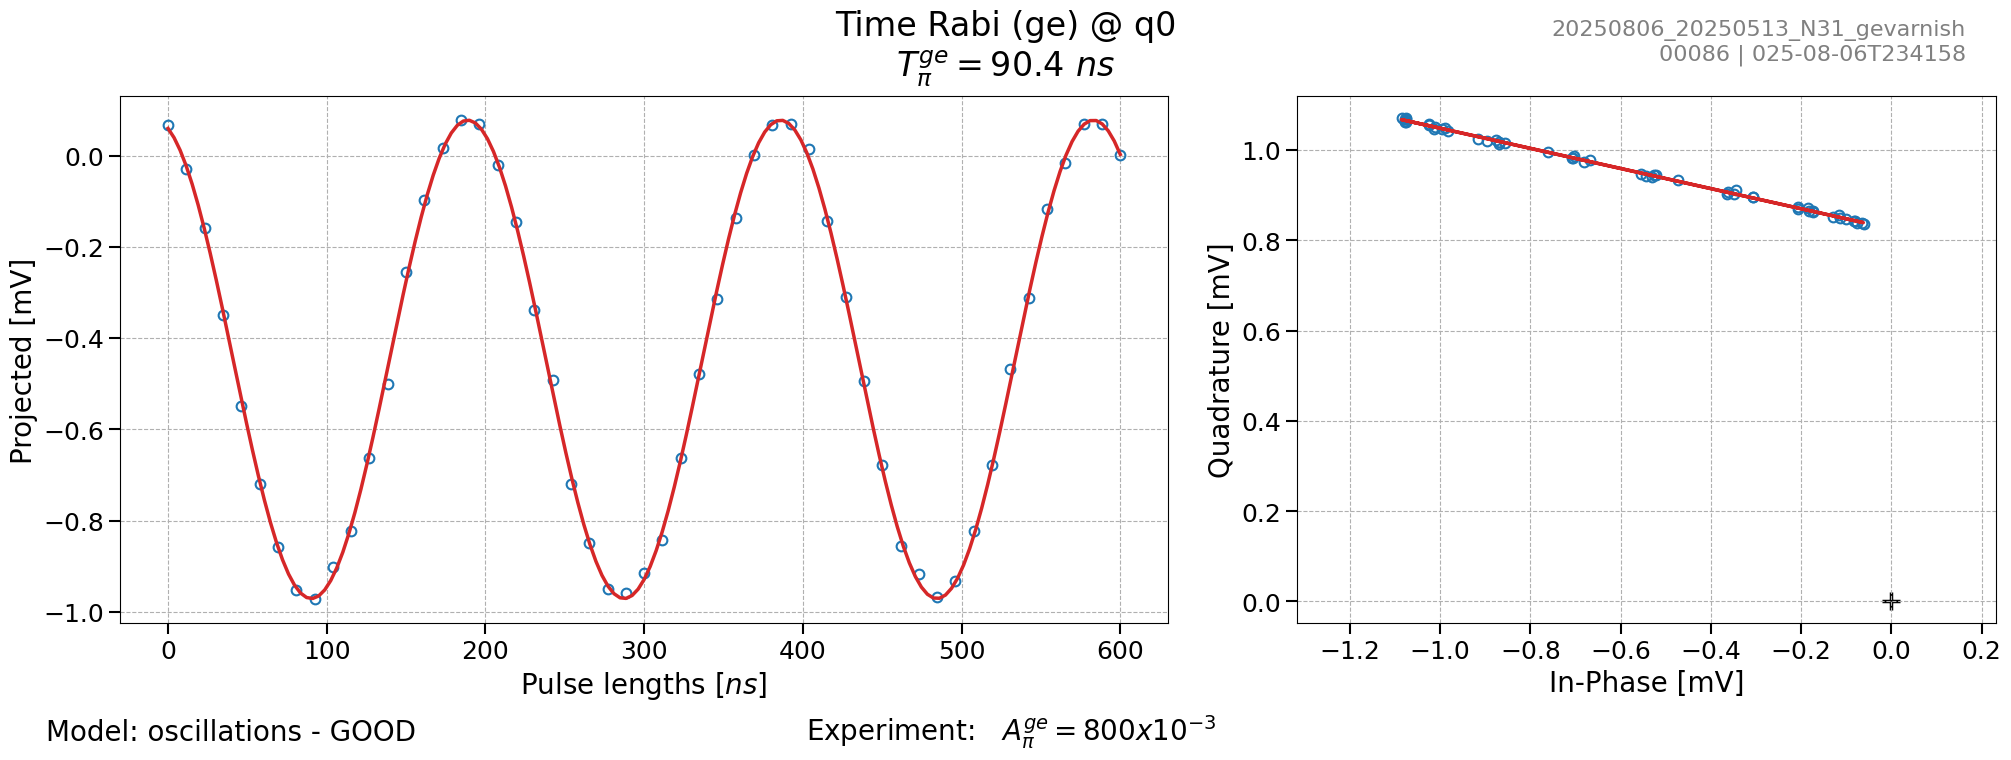

In [ ]:
import numpy as np
from time_rabi import TimeRabi, TimeRabiOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode

time_rabi = TimeRabi()
options = TimeRabiOptions()
options.count = 2**10
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = time_rabi.run(
    [np.linspace(1e-10, 600e-9, 53)],
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"resonance_frequency_ge": np.linspace(qu_freq-5e6, qu_freq+5e6, 11)},
    # transition="ef",
    qu_ids=["q0"],
    options=options,
)

### T1

2025-08-06 23:42:17,725 - INFO - Successfully connected to zi


[2025.08.06 23:42:17.734] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.06 23:42:17.735] INFO    VERSION: laboneq 2.57.0
[2025.08.06 23:42:17.735] INFO    Connecting to data server at localhost:8004
[2025.08.06 23:42:17.740] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.06 23:42:17.747] INFO    Configuring the device setup
[2025.08.06 23:42:17.755] INFO    The device setup is configured


2025-08-06 23:42:17,764 - INFO - Setting up instruments
2025-08-06 23:42:17,765 - INFO - Before exp


[2025.08.06 23:42:17.772] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.06 23:42:17.780] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.06 23:42:17.781] INFO    Starting LabOne Q Compiler run...
[2025.08.06 23:42:17.788] INFO    Schedule completed. [0.005 s]
[2025.08.06 23:42:17.789] INFO    Code generation completed for all AWGs. [0.007 s]
[2025.08.06 23:42:17.797] INFO    Completed compilation step 1 of 1. [0.014 s]
[2025.08.06 23:42:17.799] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:42:17.801] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.06 23:42:17.801] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:42:17.803] INFO      shfqc_0        0         99            0           1      8000  
[2025.08.06 23:42:17.804] INFO      shfqc_0_

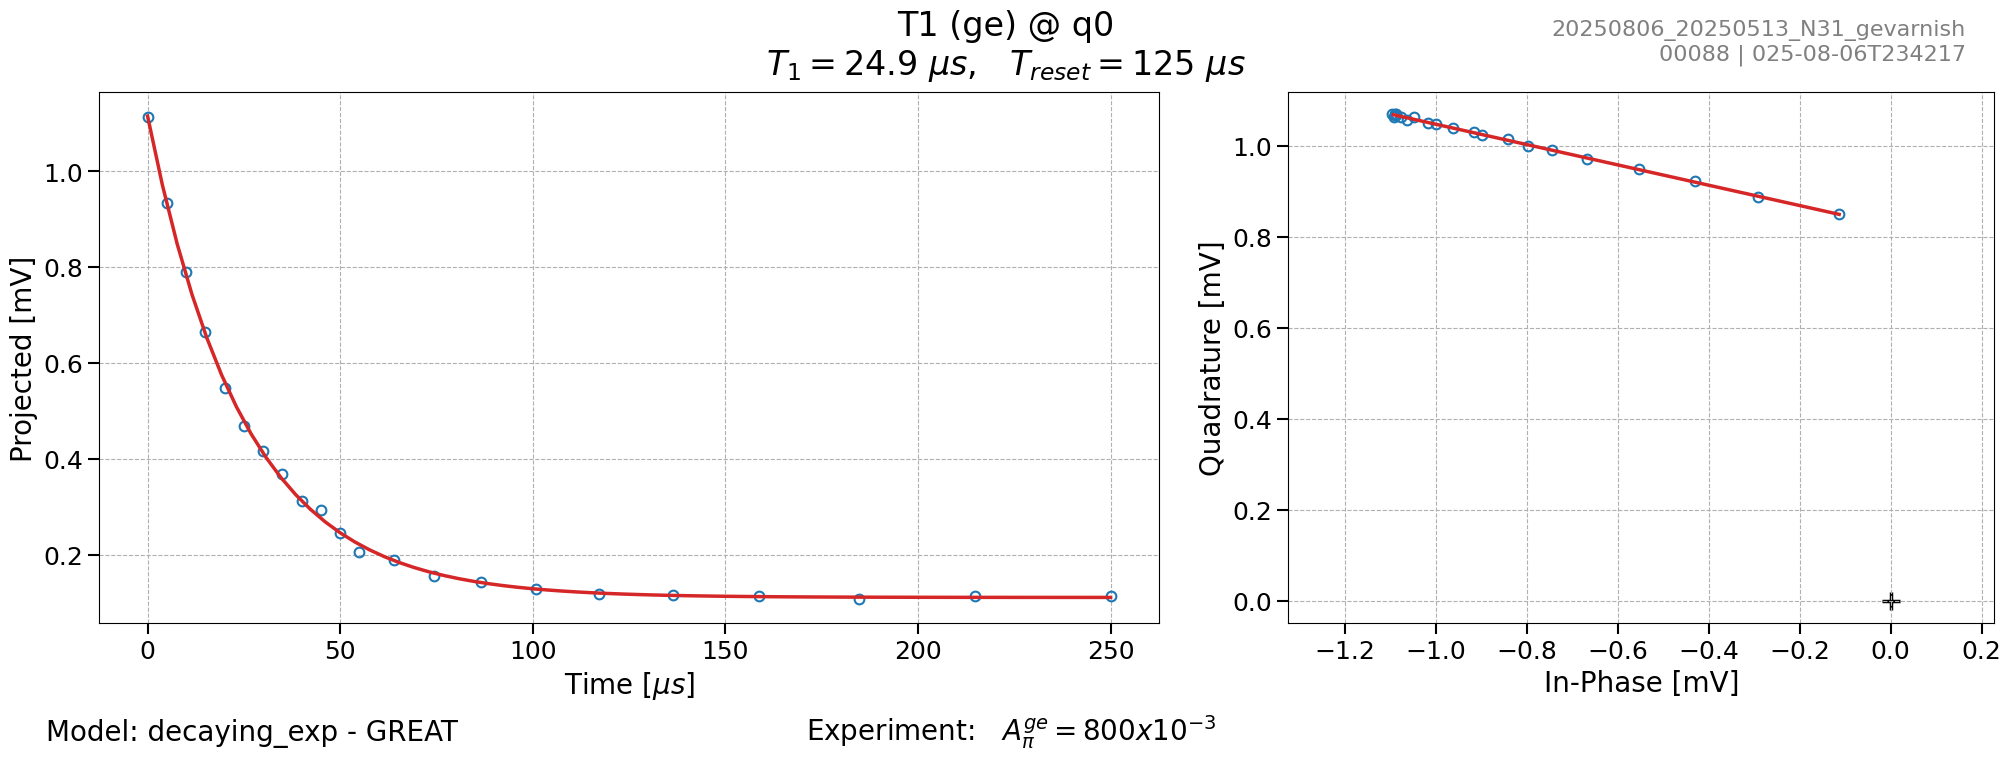

In [ ]:
from sqil_experiments.measurements.T1 import T1
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

T1_value = 50e-6

time = np.hstack(
    [
        np.linspace(0, T1_value, 11),
        np.logspace(np.log(T1_value * 1.1), np.log(5 * T1_value), 11, base=np.e),
    ]
)

options =TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11


T1_exp = T1()
result = T1_exp.run(
    [time],
    # sweeps={"index": np.arange(2)},
    options=options,
)

### T2 echo

2025-08-06 23:42:28,669 - INFO - Successfully connected to zi


[2025.08.06 23:42:28.675] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.06 23:42:28.677] INFO    VERSION: laboneq 2.57.0
[2025.08.06 23:42:28.679] INFO    Connecting to data server at localhost:8004
[2025.08.06 23:42:28.679] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.06 23:42:28.689] INFO    Configuring the device setup
[2025.08.06 23:42:28.693] INFO    The device setup is configured


2025-08-06 23:42:28,706 - INFO - Setting up instruments
2025-08-06 23:42:28,706 - INFO - Before exp


[2025.08.06 23:42:28.717] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.06 23:42:28.717] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.06 23:42:28.717] INFO    Starting LabOne Q Compiler run...
[2025.08.06 23:42:28.730] INFO    Schedule completed. [0.008 s]
[2025.08.06 23:42:28.744] INFO    Code generation completed for all AWGs. [0.014 s]
[2025.08.06 23:42:28.744] INFO    Completed compilation step 1 of 1. [0.024 s]
[2025.08.06 23:42:28.744] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:42:28.744] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.06 23:42:28.744] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:42:28.744] INFO      shfqc_0        0         99            0           1      8000  
[2025.08.06 23:42:28.744] INFO      shfqc_0_

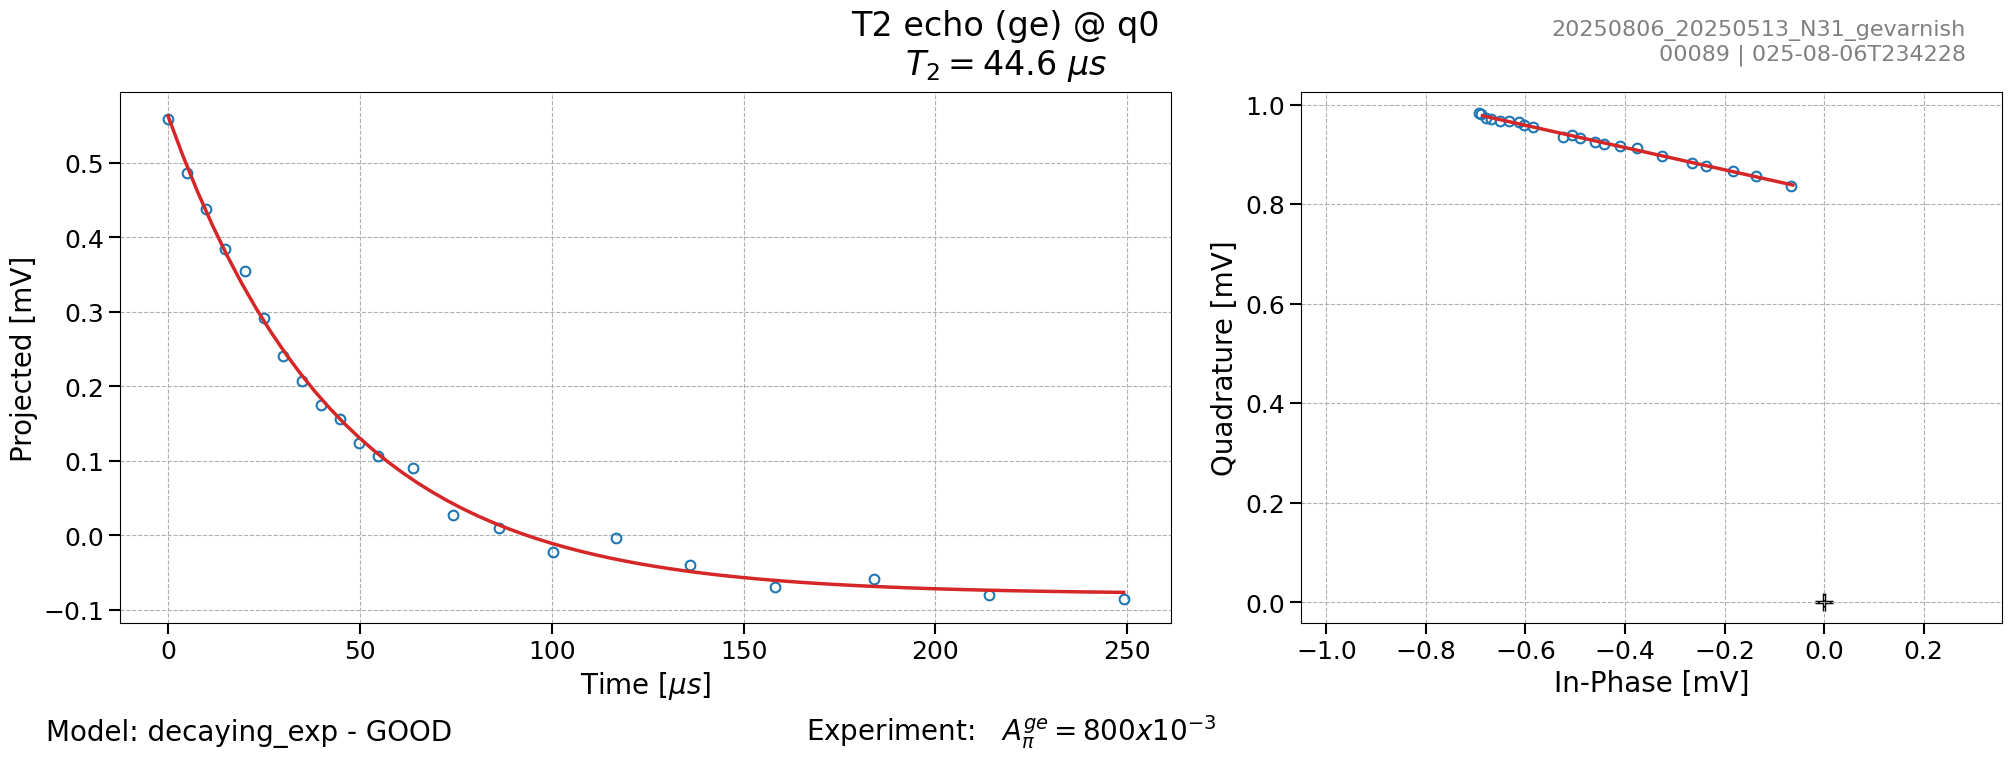

In [ ]:
from sqil_experiments.measurements.T2_echo import T2Echo, EchoExperimentOptions
import numpy as np
from laboneq.dsl.enums import AcquisitionType

T2_exp = T2Echo()

two_T1 = 2* T2_exp.qubit_value("ge_T1", "q0") or 100e-6
time = np.hstack(
    [
        np.linspace(0, two_T1, 11),
        np.logspace(np.log(two_T1 * 1.1), np.log(5 * two_T1), 11, base=np.e),
    ]
)

options = EchoExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11


result = T2_exp.run(
    [time],
    # sweeps={"index": np.arange(2)},
    options=options
)

### Interleaved T1-echo

In [ ]:
from sqil_experiments.measurements.interleaved_T1_echo import InterleavedT1Echo
from sqil_experiments.measurements.T2_echo import EchoExperimentOptions
import numpy as np
from laboneq.dsl.enums import AcquisitionType

interleaved_exp = InterleavedT1Echo()

T1_value = interleaved_exp.qubit_value("ge_T1", "q0")
time = np.hstack(
    [
        np.linspace(0, T1_value, 11),
        np.logspace(np.log(T1_value * 1.1), np.log(5 * T1_value), 11, base=np.e),
    ]
)

options = EchoExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11

result = interleaved_exp.run(
    [time],
    sweeps={"index": np.arange(500)},
    options=options
)

2025-08-06 23:48:32,315 - INFO - Successfully connected to zi


[2025.08.06 23:48:32.322] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.06 23:48:32.335] INFO    VERSION: laboneq 2.57.0
[2025.08.06 23:48:32.336] INFO    Connecting to data server at localhost:8004
[2025.08.06 23:48:32.339] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.06 23:48:32.347] INFO    Configuring the device setup
[2025.08.06 23:48:32.355] INFO    The device setup is configured


2025-08-06 23:48:32,356 - INFO - Setting up instruments
2025-08-06 23:48:32,368 - INFO - Before exp


[2025.08.06 23:48:32.389] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.06 23:48:32.390] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.06 23:48:32.391] INFO    Starting LabOne Q Compiler run...
[2025.08.06 23:48:32.406] INFO    Schedule completed. [0.013 s]
[2025.08.06 23:48:32.425] INFO    Code generation completed for all AWGs. [0.019 s]
[2025.08.06 23:48:32.427] INFO    Completed compilation step 1 of 1. [0.034 s]
[2025.08.06 23:48:32.428] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:48:32.428] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.06 23:48:32.428] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 23:48:32.432] INFO      shfqc_0        0        193            0           1      8000  
[2025.08.06 23:48:32.432] INFO      shfqc_0_

CancelledError: 

In [ ]:
def flatten_dict(dic):
    for parent_key, nested in dic.items():
        for key, val in nested.items():
            print(f"{parent_key}/{key}", val)

    return {
        f"{parent_key}/{key}": val
        for parent_key, nested in dic.items()
        for key, val in nested.items()
    }

from collections import defaultdict

def unflatten_dict(flat: dict) -> dict:
    nested = defaultdict(dict)
    for key, value in flat.items():
        if "/" in key:
            parent_key, field = key.split("/", 1)
            nested[parent_key][field] = value
    return dict(nested)


# flatten_dict(result2)

flatten_dict(unflatten_dict(result2))

q0/data_T1 [-4.01185383e-05+0.00081906j -4.90521566e-04+0.00092932j
 -8.15983504e-04+0.00105246j -8.32161799e-04+0.00100657j
 -5.54800461e-04+0.00099314j -8.55778031e-04+0.00103094j
 -9.04724499e-04+0.00102147j -1.11164300e-03+0.00110202j
 -1.04951300e-03+0.00101417j -8.09400984e-04+0.00097302j
 -1.07311042e-03+0.00107654j -9.65747000e-04+0.00102819j
 -1.08977591e-03+0.00100779j -1.07069364e-03+0.00107227j
 -9.95629819e-04+0.0010482j  -1.10810893e-03+0.00106472j
 -1.09086844e-03+0.00103041j -1.13546841e-03+0.00104079j
 -1.12914701e-03+0.001068j   -1.17370958e-03+0.0009653j
 -1.07855768e-03+0.00104948j -1.14219875e-03+0.00109018j]
q0/data_echo [-2.78395861e-06+0.00088825j -1.00700334e-05+0.00082182j
 -1.54155989e-04+0.00086997j -3.30639585e-04+0.00078002j
  6.28983443e-06+0.00084946j -5.56555130e-04+0.00092123j
 -5.85499988e-04+0.00087375j -2.98184153e-04+0.00088948j
 -6.04533371e-04+0.00092999j -5.49320939e-04+0.00093622j
 -1.11880501e-03+0.00113264j -1.12682354e-03+0.00106436j
 -3.828

{'q0/data_T1': array([-4.01185383e-05+0.00081906j, -4.90521566e-04+0.00092932j,
        -8.15983504e-04+0.00105246j, -8.32161799e-04+0.00100657j,
        -5.54800461e-04+0.00099314j, -8.55778031e-04+0.00103094j,
        -9.04724499e-04+0.00102147j, -1.11164300e-03+0.00110202j,
        -1.04951300e-03+0.00101417j, -8.09400984e-04+0.00097302j,
        -1.07311042e-03+0.00107654j, -9.65747000e-04+0.00102819j,
        -1.08977591e-03+0.00100779j, -1.07069364e-03+0.00107227j,
        -9.95629819e-04+0.0010482j , -1.10810893e-03+0.00106472j,
        -1.09086844e-03+0.00103041j, -1.13546841e-03+0.00104079j,
        -1.12914701e-03+0.001068j  , -1.17370958e-03+0.0009653j ,
        -1.07855768e-03+0.00104948j, -1.14219875e-03+0.00109018j]),
 'q0/data_echo': array([-2.78395861e-06+0.00088825j, -1.00700334e-05+0.00082182j,
        -1.54155989e-04+0.00086997j, -3.30639585e-04+0.00078002j,
         6.28983443e-06+0.00084946j, -5.56555130e-04+0.00092123j,
        -5.85499988e-04+0.00087375j, -2.9818

### Ramsey

2025-08-06 13:36:05,817 - INFO - Successfully connected to zi


[2025.08.06 13:36:05.823] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.06 13:36:05.825] INFO    VERSION: laboneq 2.57.0
[2025.08.06 13:36:05.826] INFO    Connecting to data server at localhost:8004
[2025.08.06 13:36:05.829] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.06 13:36:05.834] INFO    Configuring the device setup
[2025.08.06 13:36:05.844] INFO    The device setup is configured


2025-08-06 13:36:05,855 - INFO - Setting up instruments
2025-08-06 13:36:05,855 - INFO - Before exp


[2025.08.06 13:36:05.867] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.06 13:36:05.868] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.06 13:36:05.869] INFO    Starting LabOne Q Compiler run...
[2025.08.06 13:36:05.897] INFO    Schedule completed. [0.025 s]
[2025.08.06 13:36:05.941] INFO    Code generation completed for all AWGs. [0.051 s]
[2025.08.06 13:36:05.941] INFO    Completed compilation step 1 of 1. [0.079 s]
[2025.08.06 13:36:05.952] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 13:36:05.955] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.06 13:36:05.956] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.06 13:36:05.957] INFO      shfqc_0        0        513            0           1      8000  
[2025.08.06 13:36:05.958] INFO      shfqc_0_

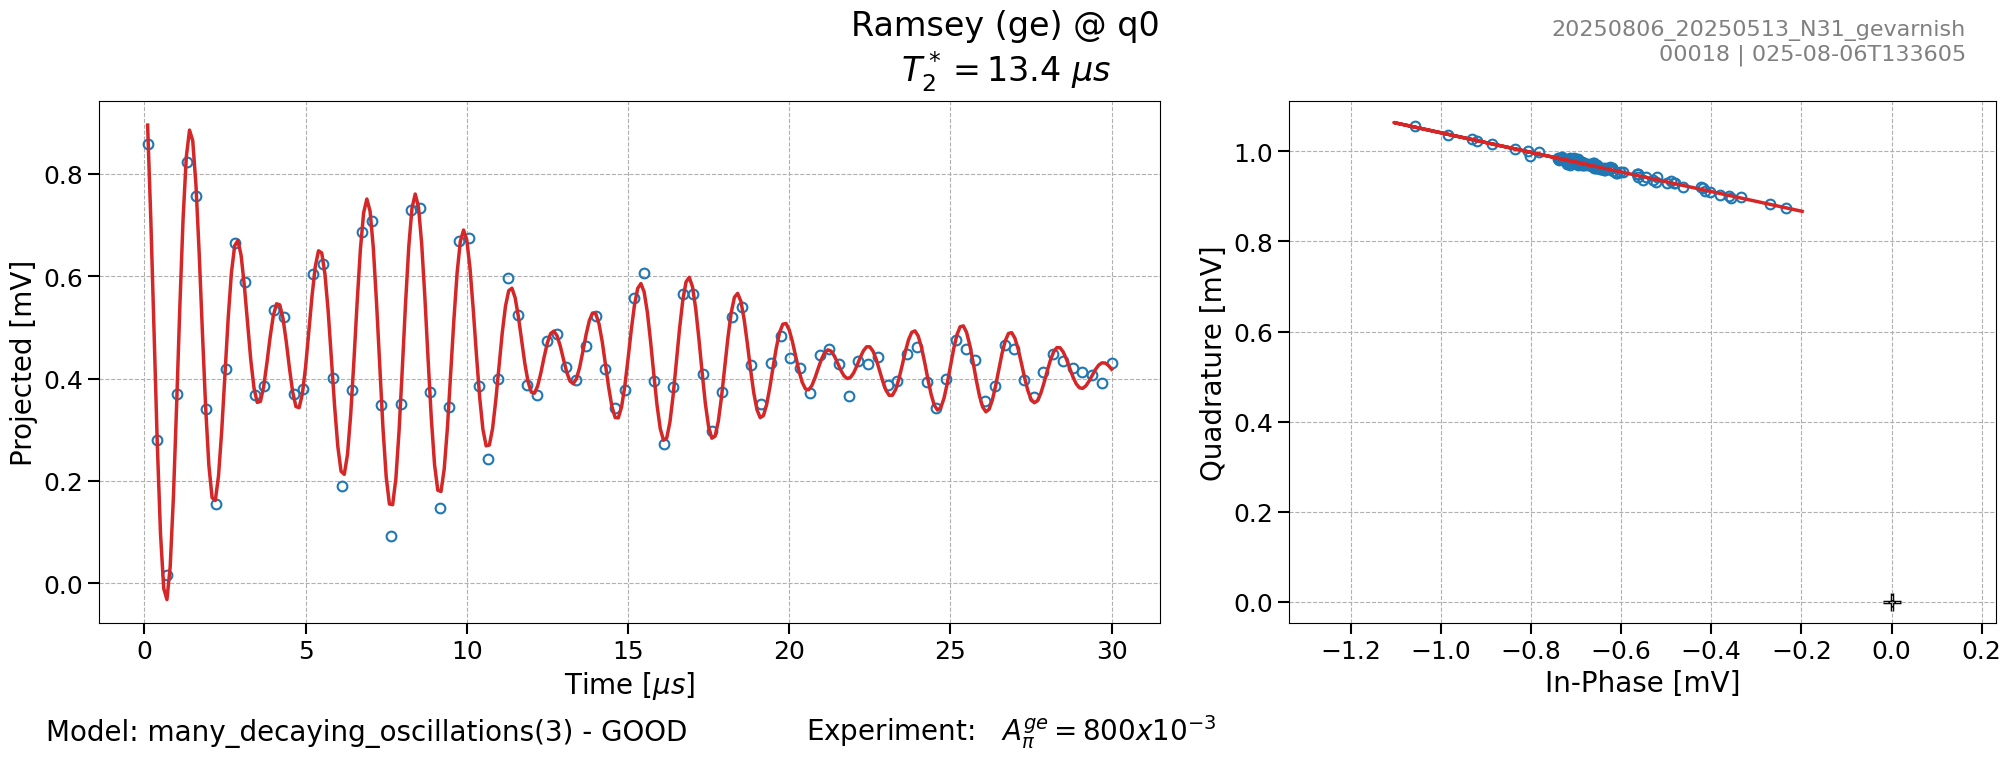

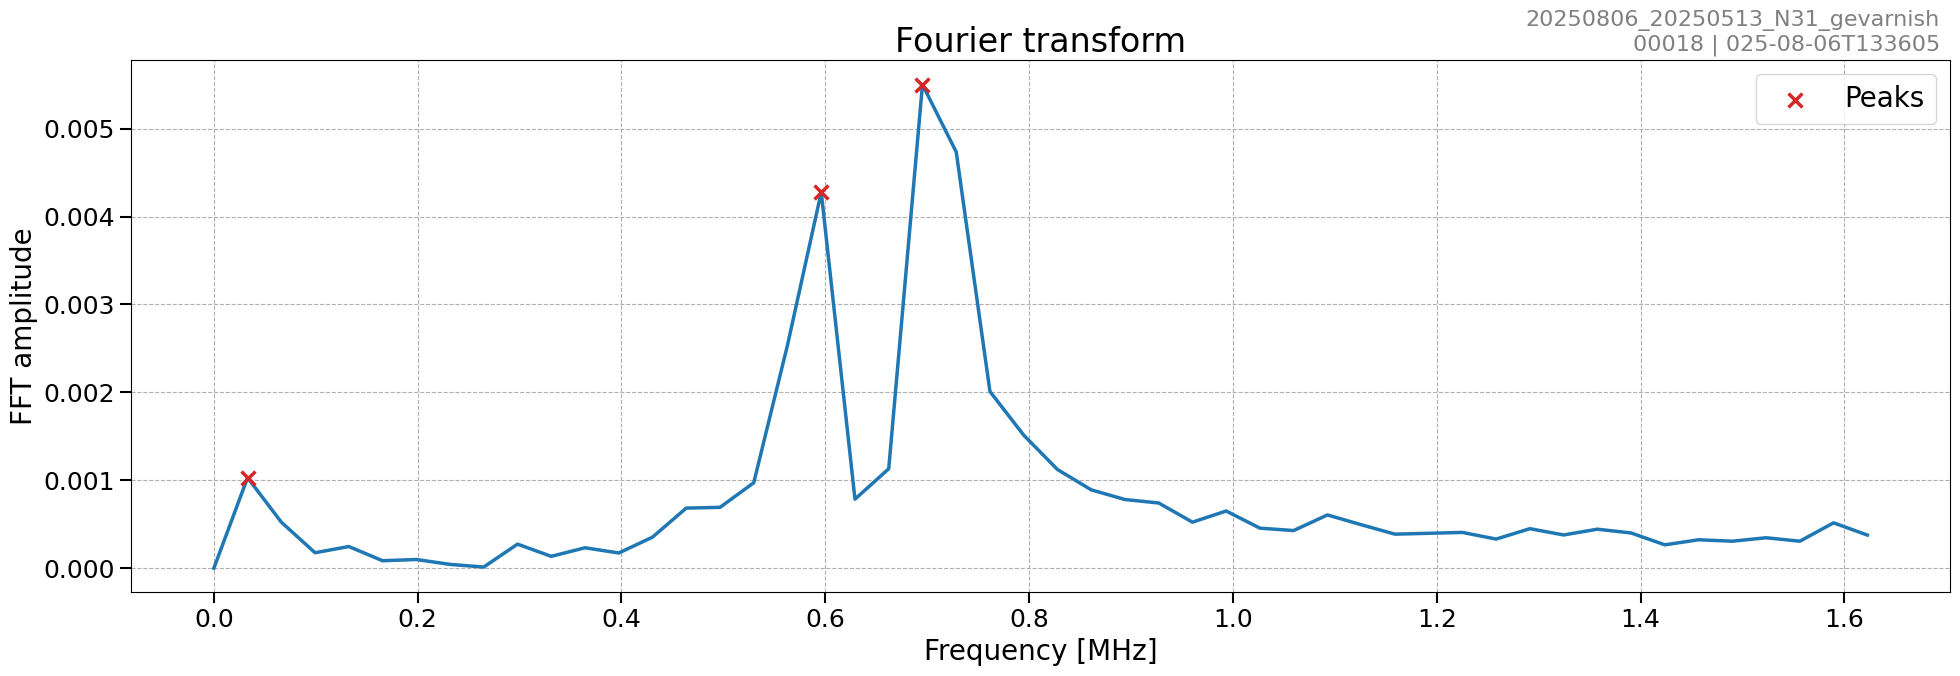

In [ ]:
from sqil_experiments.measurements.ramsey import Ramsey
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

time = np.linspace(0.1e-6, 30e-6, 100)
detuning = 0.1e6

options = TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**10


ramsey_exp = Ramsey()
result = ramsey_exp.run(
    [time],
    [detuning],
    options=options,
)

### Tests

In [ ]:
import numpy as np
10 + 20 * np.log10(0.04)

np.float64(-17.95880017344075)

2025-08-03 20:28:20,792 - INFO - Successfully connected to zi


[2025.08.03 20:28:20.792] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.03 20:28:20.792] INFO    VERSION: laboneq 2.57.0
[2025.08.03 20:28:20.801] INFO    Connecting to data server at localhost:8004
[2025.08.03 20:28:20.808] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.03 20:28:20.815] INFO    Configuring the device setup
[2025.08.03 20:28:20.823] INFO    The device setup is configured


2025-08-03 20:28:20,826 - INFO - Setting up instruments
2025-08-03 20:28:20,827 - INFO - Before exp


[2025.08.03 20:28:20.838] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.03 20:28:20.839] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.08.03 20:28:20.841] INFO    Starting LabOne Q Compiler run...
[2025.08.03 20:28:20.868] INFO    Schedule completed. [0.025 s]
[2025.08.03 20:28:20.890] INFO    Code generation completed for all AWGs. [0.022 s]
[2025.08.03 20:28:20.890] INFO    Completed compilation step 1 of 1. [0.049 s]
[2025.08.03 20:28:20.890] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.03 20:28:20.890] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.03 20:28:20.890] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.03 20:28:20.890] INFO      shfqc_0        0         21            0           1      8000  
[2025.08.03 20:28:20.900] INFO      shfqc_0_sg    

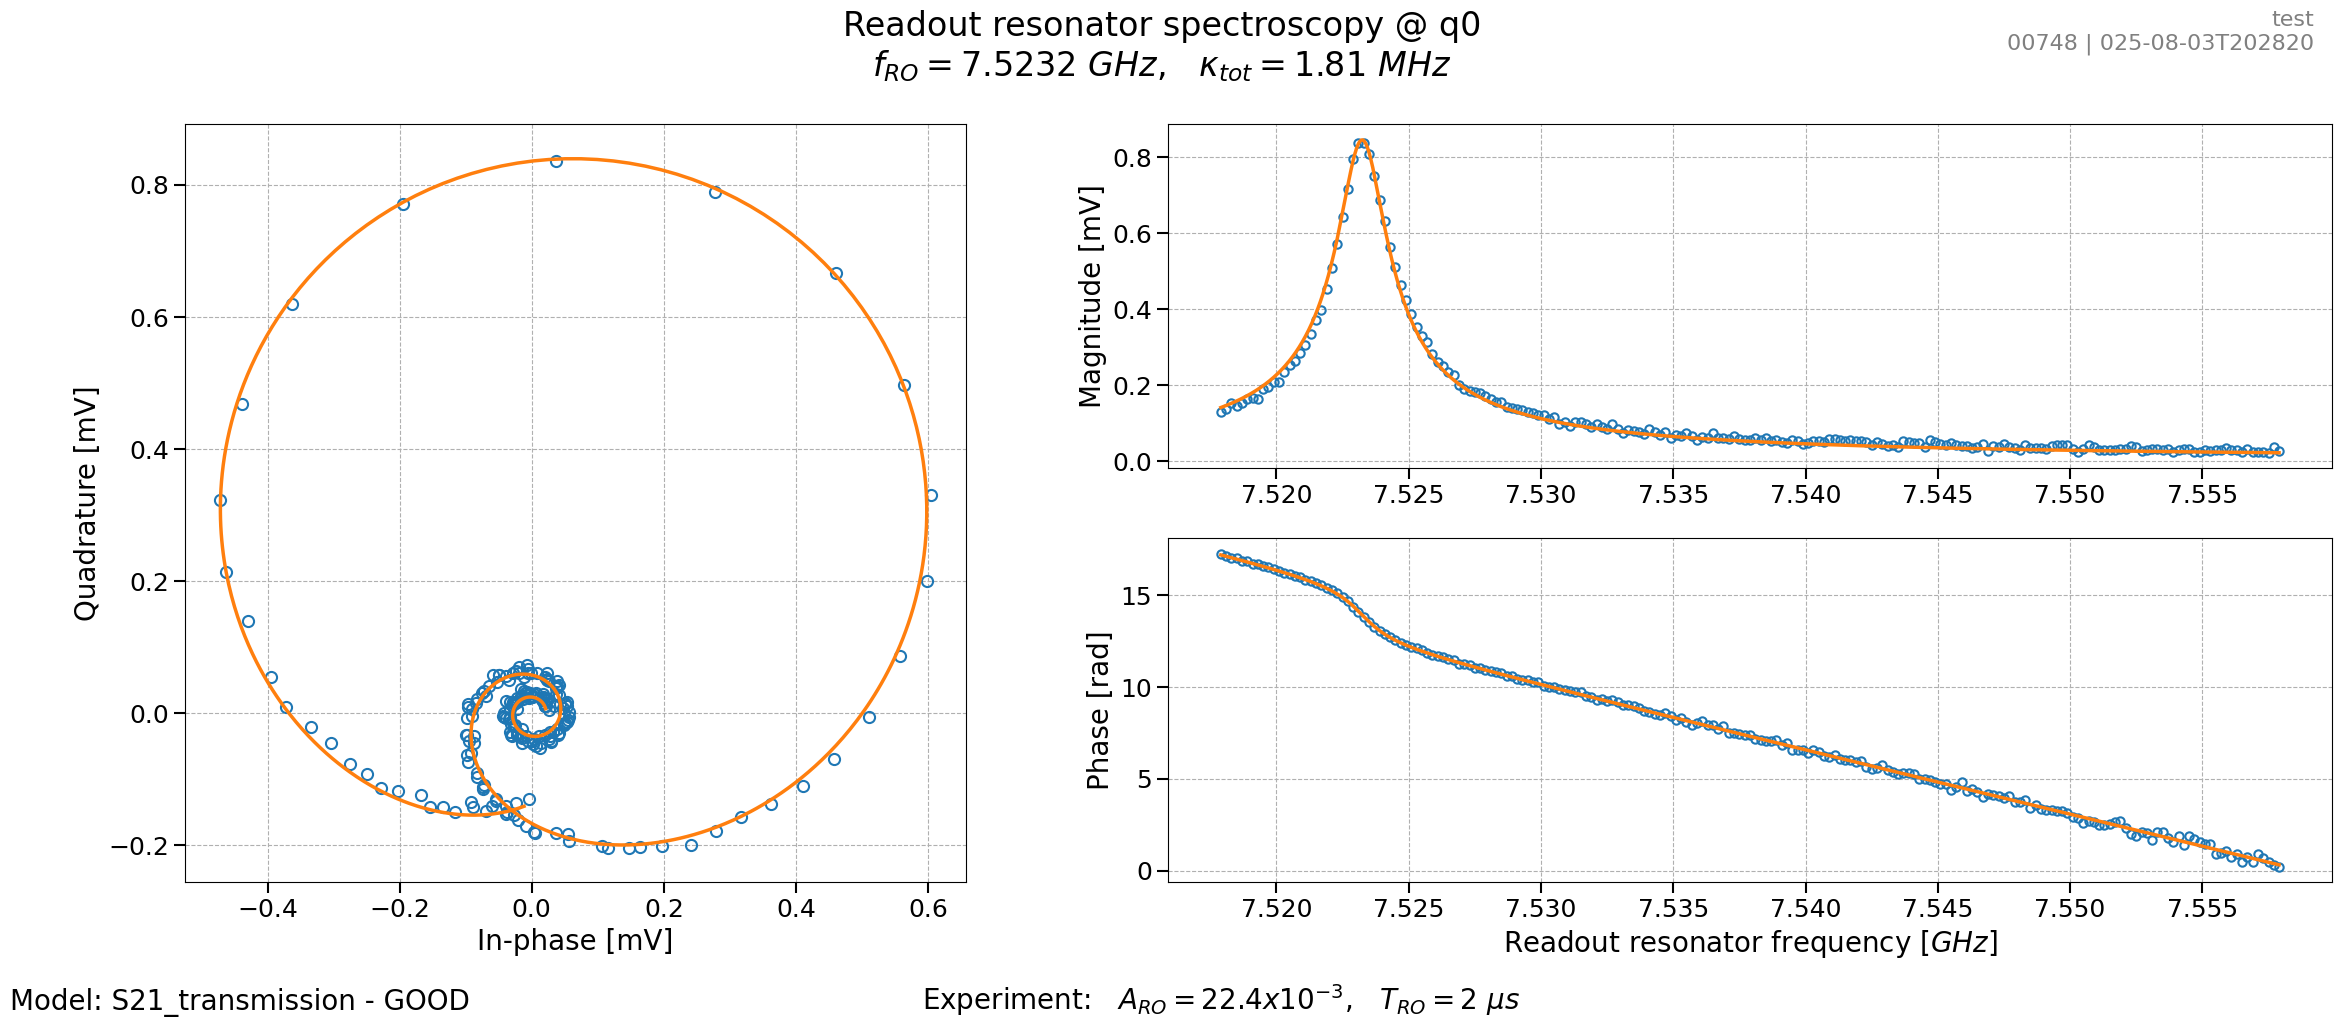

In [ ]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.5379e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 400

result = rr_spec.run(
    np.linspace(ro_freq + 20e6, ro_freq - 20e6, 201),
    # sweeps={"readout_amplitude": np.linspace(0.003, 0.03, 3)},
    # sweeps={"current": np.linspace(1e-4, 2e-4, 3)},
    options=options,
)

average relative std: 0.45369850227250913
average std: 9.460869266857227e-05
std of the std: 1.3977359178516824e-05
relative std over std avg: 0.14773863568204568


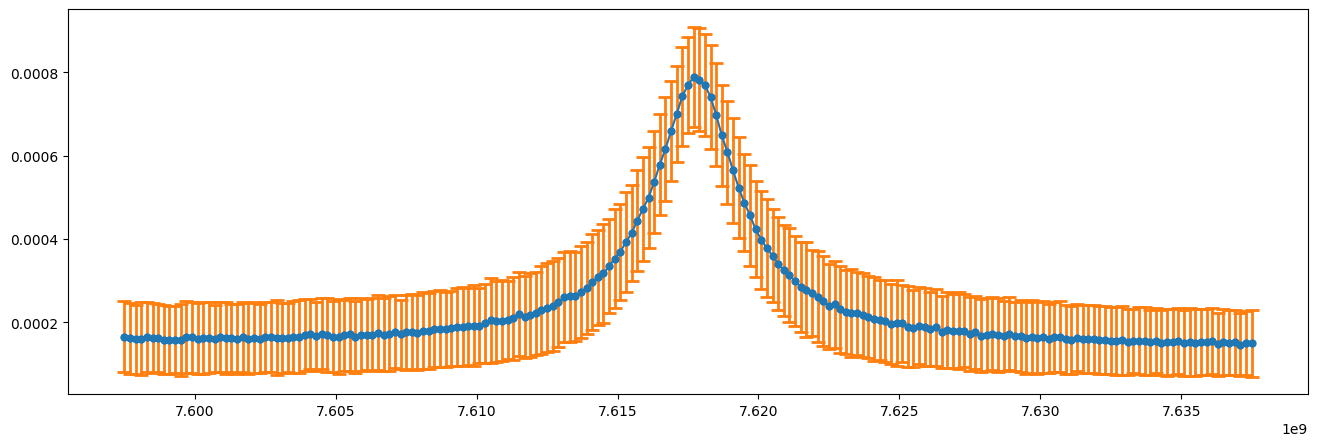

In [ ]:
import sqil_core as sqil
import matplotlib.pyplot as plt

# count = 2600
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00163-rr_spectroscopy_2025-05-14T012721"
# count = 1048
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00158-rr_spectroscopy_2025-05-14T012004"
# count = 200
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00165-rr_spectroscopy_2025-05-14T014453"
# count = 100
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00164-rr_spectroscopy_2025-05-14T012812"
# count = 2
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00159-rr_spectroscopy_2025-05-14T012109"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)
linmag = np.abs(data[0])
print(
    "average relative std:", np.mean(np.std(linmag, axis=0) / np.mean(linmag, axis=0))
)
print("average std:", np.mean(np.std(linmag, axis=0)))
print("std of the std:", np.std(np.std(linmag, axis=0)))
print(
    "relative std over std avg:",
    np.mean(np.std(np.std(linmag, axis=0)) / np.mean(np.std(linmag, axis=0))),
)

plt.figure(figsize=(16, 5))
plt.errorbar(
    freq[0],
    np.mean(linmag, axis=0),
    np.std(linmag, axis=0),
    fmt="-o",
    color="tab:blue",
    label="Mean with Error",
    ecolor="tab:orange",
    capsize=5,
    capthick=2,
    elinewidth=2,
    markersize=5,
)
plt.show()

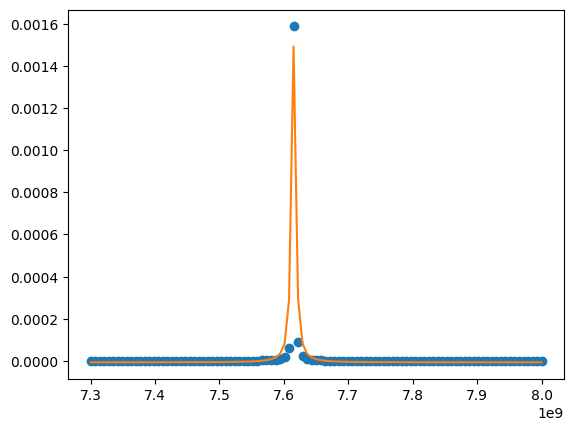

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

fit_res = sqil.fit.fit_lorentzian(freq, np.abs(data)**2)

plt.plot(freq, np.abs(data)**2, 'o')
plt.plot(freq, fit_res.predict(freq))
plt.show()

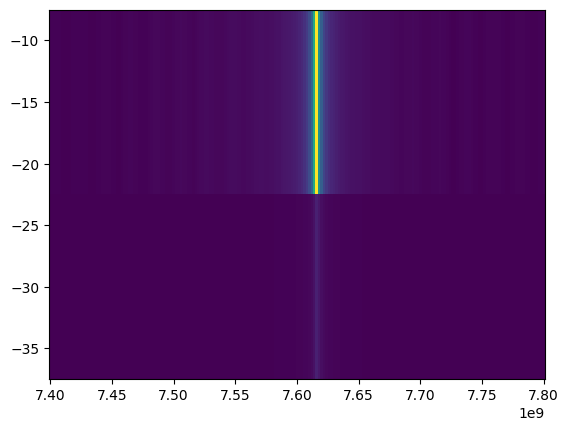

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


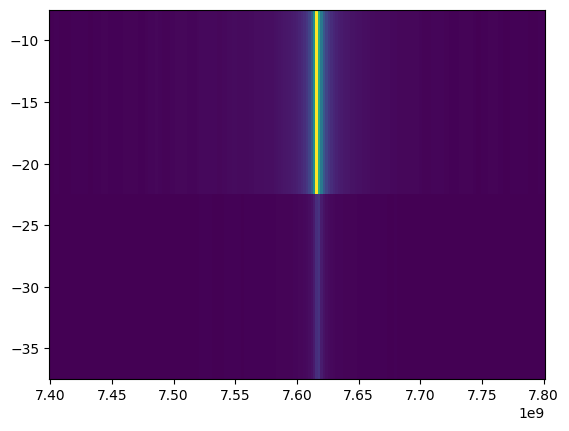

In [ ]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)

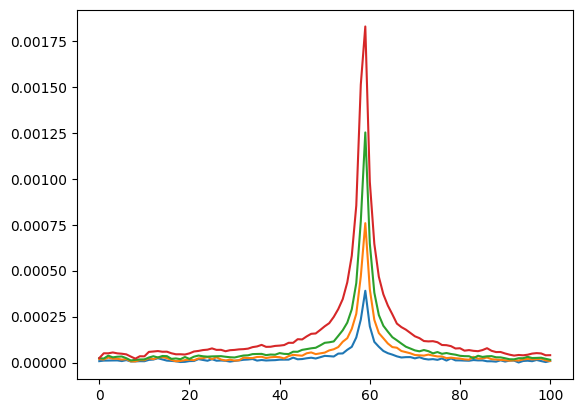

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00126-rr spectroscopy_2025-05-13T222549"

data, freq, sweep0, sweep1 = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0", "sweep1"])

data.shape, freq.shape, sweep0.shape, sweep1.shape

plt.plot(np.abs(data).T)